In [2]:
import pandas as pd

# Load the dataset
file_path = '/Users/apple/Desktop/Last_year/IRS/222102535karim_assignment3/222102535karim_Preprosising_reviews.csv'
data = pd.read_csv(file_path)

data.head()


Customer Name  \
0          Gloria V.   
1        T. J. Wells   
2            Laura M   
3  Kathleen Edelmuth   
4      Marie Valerie   

   A Little SPOT of Emotion 8 Book Box Set (Books 1-8: Anger, Anxiety, Peaceful, Happiness, Sadness, Confidence, Love, & Scribble Emotion)  \
0                                                1.0                                                                                         
1                                                1.0                                                                                         
2                                                5.0                                                                                         
3                                                3.0                                                                                         
4                                                4.0                                                                                         

   A Navy SEAL's Bug-In Guide: How to Turn Your House into the Safest Place on Earth  \
0                                                2.0                                   
1                                                2.0                                   
2                                                3.0                                   
3                                                4.0                                   
4                                                3.0                                   

   Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones  \
0                                                2.0                           
1                                                2.0                           
2                                                NaN                           
3                                                3.0                           
4                                                1.0                           

   Dad, I Want to Hear Your Story: A Father’s Guided Journal To Share His Life & His Love (Hear Your Story Books)  \
0                                                3.0                                                                
1                                                4.0                                                                
2                                                5.0                                                                
3                                                1.0                                                                
4                                                4.0                                                                

   Framed: Astonishing True Stories of Wrongful Convictions  \
0                                                3.0          
1                                                3.0          
2                                                NaN          
3                                                3.0          
4                                                2.0          

   From Here to the Great Unknown: A Memoir  \
0                                       1.0   
1                                       2.0   
2                                       5.0   
3                                       3.0   
4                                       3.0   

   Good Energy: The Surprising Connection Between Metabolism and Limitless Health  \
0                                                2.0                                
1                                                1.0                                
2                                                4.0                                
3                                                NaN                                
4                                                2.0                                

   Hot Mess (Diary of a Wimpy Kid Book 19) (Diary of a Wimpy Kid, 19) (Volume 19)  \
0                                     

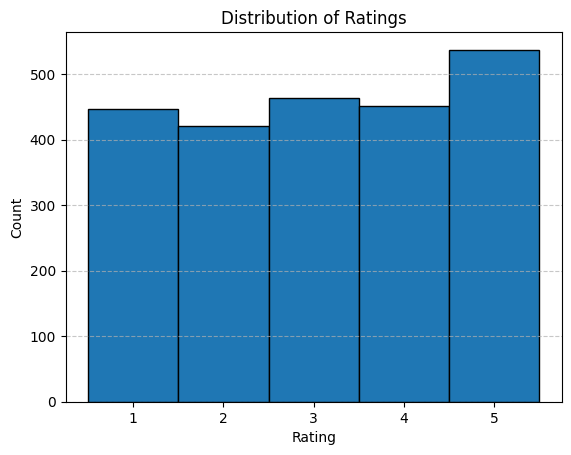

{'Total Number of Users (Tnu)': 125,
 'Total Number of Items (Tni)': 19,
 'Sparsity (%)': 2.3157894736842155,
 'Bias Level': 0.0905172413793105,
 'Two Lowest Rated Items': ('Framed: Astonishing True Stories of Wrongful Convictions',
  'Good Energy: The Surprising Connection Between Metabolism and Limitless Health')}

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#step 1 already ready
# Step 2: Count the total number of users (rows in dataset)
Tnu = data.shape[0]

# Step 3: Count the total number of items (columns excluding user-related columns)
# Assuming the first column is a user identifier or name
Tni = data.shape[1] - 1

# Step 4: Count the number of ratings for every product (non-NaN values per column)
ratings_per_product = data.iloc[:, 1:].notna().sum()

# Step 5: Draw the distribution of ratings
ratings_flat = data.iloc[:, 1:].values.flatten()
ratings_flat = ratings_flat[~np.isnan(ratings_flat)]  # Remove NaN values

plt.hist(ratings_flat, bins=np.arange(1, 7) - 0.5, edgecolor='black', align='mid')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Determine sparsity (percentage of missing ratings)
total_possible_ratings = Tnu * Tni
actual_ratings = len(ratings_flat)
sparsity = (1 - actual_ratings / total_possible_ratings) * 100

# Check for bias (mean rating deviation from neutral 3)
mean_rating = np.mean(ratings_flat)
bias_level = mean_rating - 3

# Step 6: Choose the two lowest-rated items
avg_ratings_per_product = data.iloc[:, 1:].mean()
lowest_rated_items = avg_ratings_per_product.nsmallest(2).index.tolist()
I1, I2 = lowest_rated_items

# Results Summary
results = {
    "Total Number of Users (Tnu)": Tnu,
    "Total Number of Items (Tni)": Tni,
    "Sparsity (%)": sparsity,
    "Bias Level": bias_level,
    "Two Lowest Rated Items": (I1, I2)
}

# Display the results
results


In [4]:
# Calculate the average rating for each of the target items (I1 and I2)
I1, I2 = "Framed: Astonishing True Stories of Wrongful Convictions", \
         "Good Energy: The Surprising Connection Between Metabolism and Limitless Health"

I1_mean = data[I1].mean()
I2_mean = data[I2].mean()

# Use the mean-filling method to replace missing values for I1 and I2
data[I1].fillna(I1_mean, inplace=True)
data[I2].fillna(I2_mean, inplace=True)

# Calculate the average rating for each item
average_ratings_per_item = data.iloc[:, 1:].mean()

# For each item, calculate the difference between ratings and the mean rating
rating_diff = data.iloc[:, 1:].subtract(average_ratings_per_item, axis=1)

# Compute the covariance matrix
covariance_matrix = rating_diff.cov()

# Extract covariance values for I1 and I2 with other items
I1_covariance = covariance_matrix[I1]
I2_covariance = covariance_matrix[I2]

# Results Summary
pca_results = {
    "I1 Average Rating": I1_mean,
    "I2 Average Rating": I2_mean,
    "Covariance Matrix (I1)": I1_covariance,
    "Covariance Matrix (I2)": I2_covariance,
}

# Display results for I1 and I2
pca_results


/var/folders/2t/bv9pyvvs1y39zktfxmgd8bnc0000gn/T/ipykernel_1184/1942433508.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[I1].fillna(I1_mean, inplace=True)
/var/folders/2t/bv9pyvvs1y39zktfxmgd8bnc0000gn/T/ipykernel_1184/1942433508.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

{'I1 Average Rating': 2.85,
 'I2 Average Rating': 2.886178861788618,
 'Covariance Matrix (I1)': A Little SPOT of Emotion 8 Book Box Set (Books 1-8: Anger, Anxiety, Peaceful, Happiness, Sadness, Confidence, Love, & Scribble Emotion)            -0.178594
 A Navy SEAL's Bug-In Guide: How to Turn Your House into the Safest Place on Earth                                                                   0.024312
 Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones                                                                           0.283674
 Dad, I Want to Hear Your Story: A Father’s Guided Journal To Share His Life & His Love (Hear Your Story Books)                                      0.198537
 Framed: Astonishing True Stories of Wrongful Convictions                                                                                            1.784677
 From Here to the Great Unknown: A Memoir                                                                          

In [5]:
# Step 6: Generate covariance matrix for all items
full_covariance_matrix = covariance_matrix

# Step 7: Determine the top 5 and top 10 peers for each of the target items
# Sort items by covariance values (excluding the target item itself)
I1_top_5_peers = I1_covariance.drop(I1).nlargest(5).index.tolist()
I1_top_10_peers = I1_covariance.drop(I1).nlargest(10).index.tolist()

I2_top_5_peers = I2_covariance.drop(I2).nlargest(5).index.tolist()
I2_top_10_peers = I2_covariance.drop(I2).nlargest(10).index.tolist()

# Results for Top Peers
top_peers_results = {
    "I1 Top 5 Peers": I1_top_5_peers,
    "I1 Top 10 Peers": I1_top_10_peers,
    "I2 Top 5 Peers": I2_top_5_peers,
    "I2 Top 10 Peers": I2_top_10_peers,
}

# Display results for top peers
top_peers_results


{'I1 Top 5 Peers': ['Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones',
  'The Grey Wolf: A Novel (Chief Inspector Gamache Novel Book 19)',
  'Dad, I Want to Hear Your Story: A Father’s Guided Journal To Share His Life & His Love (Hear Your Story Books)',
  'The Wingmen: The Unlikely, Unusual, Unbreakable Friendship Between John Glenn and Ted Williams',
  'Relentless Sales: The Skills, Mentality, & Faith Needed to Be Great in Sales'],
 'I1 Top 10 Peers': ['Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones',
  'The Grey Wolf: A Novel (Chief Inspector Gamache Novel Book 19)',
  'Dad, I Want to Hear Your Story: A Father’s Guided Journal To Share His Life & His Love (Hear Your Story Books)',
  'The Wingmen: The Unlikely, Unusual, Unbreakable Friendship Between John Glenn and Ted Williams',
  'Relentless Sales: The Skills, Mentality, & Faith Needed to Be Great in Sales',
  'From Here to the Great Unknown: A Memoir',
  'The Coming Golden Age: 

In [6]:
# Step 3.3.1: Generate the covariance matrix using Maximum Likelihood Estimation (MLE)
# MLE for covariance only considers overlapping (non-NaN) user ratings for each pair of items

def compute_mle_covariance_matrix(dataframe):
    items = dataframe.columns[1:]  # Exclude user column
    covariance_matrix = pd.DataFrame(index=items, columns=items, dtype=float)
    
    for item1 in items:
        for item2 in items:
            # Extract non-NaN ratings for both items
            ratings1 = dataframe[item1]
            ratings2 = dataframe[item2]
            common_ratings = ratings1.notna() & ratings2.notna()
            
            if common_ratings.sum() > 0:
                # Compute covariance only for overlapping ratings
                covariance_matrix.at[item1, item2] = np.cov(
                    ratings1[common_ratings], ratings2[common_ratings]
                )[0, 1]
            else:
                covariance_matrix.at[item1, item2] = 0  # No common ratings
                
    return covariance_matrix

mle_covariance_matrix = compute_mle_covariance_matrix(data)

# Step 3.3.2: Determine the top 5 and top 10 peers for each target item (I1 and I2)
I1_mle_covariance = mle_covariance_matrix[I1]
I2_mle_covariance = mle_covariance_matrix[I2]

I1_mle_top_5_peers = I1_mle_covariance.drop(I1).nlargest(5).index.tolist()
I1_mle_top_10_peers = I1_mle_covariance.drop(I1).nlargest(10).index.tolist()

I2_mle_top_5_peers = I2_mle_covariance.drop(I2).nlargest(5).index.tolist()
I2_mle_top_10_peers = I2_mle_covariance.drop(I2).nlargest(10).index.tolist()

# Results Summary for MLE
mle_peers_results = {
    "I1 MLE Top 5 Peers": I1_mle_top_5_peers,
    "I1 MLE Top 10 Peers": I1_mle_top_10_peers,
    "I2 MLE Top 5 Peers": I2_mle_top_5_peers,
    "I2 MLE Top 10 Peers": I2_mle_top_10_peers,
}

# Display MLE-based top peers results
mle_peers_results


{'I1 MLE Top 5 Peers': ['Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones',
  'The Grey Wolf: A Novel (Chief Inspector Gamache Novel Book 19)',
  'Dad, I Want to Hear Your Story: A Father’s Guided Journal To Share His Life & His Love (Hear Your Story Books)',
  'The Wingmen: The Unlikely, Unusual, Unbreakable Friendship Between John Glenn and Ted Williams',
  'Relentless Sales: The Skills, Mentality, & Faith Needed to Be Great in Sales'],
 'I1 MLE Top 10 Peers': ['Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones',
  'The Grey Wolf: A Novel (Chief Inspector Gamache Novel Book 19)',
  'Dad, I Want to Hear Your Story: A Father’s Guided Journal To Share His Life & His Love (Hear Your Story Books)',
  'The Wingmen: The Unlikely, Unusual, Unbreakable Friendship Between John Glenn and Ted Williams',
  'Relentless Sales: The Skills, Mentality, & Faith Needed to Be Great in Sales',
  'From Here to the Great Unknown: A Memoir',
  'The Coming Gold

In [7]:
from sklearn.decomposition import PCA

# Step 3.3.3: Reduce dimensional space for users using the top 5 peers
def reduce_dimensionality(dataframe, top_peers):
    # Subset data to only include the top peers
    peer_data = dataframe[top_peers]
    peer_data_filled = peer_data.fillna(peer_data.mean())  # Fill missing values with column means

    # Apply PCA
    pca = PCA(n_components=min(len(top_peers), peer_data.shape[0]))
    reduced_space = pca.fit_transform(peer_data_filled)

    return reduced_space

# Reduced dimensional space for I1 and I2 using top 5 peers
I1_reduced_5 = reduce_dimensionality(data, I1_mle_top_5_peers)
I2_reduced_5 = reduce_dimensionality(data, I2_mle_top_5_peers)

# Step 3.3.5: Reduce dimensional space for users using the top 10 peers
# Reduced dimensional space for I1 and I2 using top 10 peers
I1_reduced_10 = reduce_dimensionality(data, I1_mle_top_10_peers)
I2_reduced_10 = reduce_dimensionality(data, I2_mle_top_10_peers)

# Summarize dimensionality reduction results
dimensionality_reduction_results = {
    "I1 Reduced Dimensional Space (Top 5 Peers)": I1_reduced_5.shape,
    "I2 Reduced Dimensional Space (Top 5 Peers)": I2_reduced_5.shape,
    "I1 Reduced Dimensional Space (Top 10 Peers)": I1_reduced_10.shape,
    "I2 Reduced Dimensional Space (Top 10 Peers)": I2_reduced_10.shape,
}

# Display the results
dimensionality_reduction_results


{'I1 Reduced Dimensional Space (Top 5 Peers)': (125, 5),
 'I2 Reduced Dimensional Space (Top 5 Peers)': (125, 5),
 'I1 Reduced Dimensional Space (Top 10 Peers)': (125, 10),
 'I2 Reduced Dimensional Space (Top 10 Peers)': (125, 10)}

In [8]:
def predict_ratings_fixed(dataframe, target_item, top_peers, reduced_space):
    """
    Predict missing ratings for a target item based on reduced dimensional space.
    Ratings are predicted as the average of the top peers' ratings weighted by the reduced space.
    """
    # Subset and fill missing data for top peers
    peer_data = dataframe[top_peers]
    peer_data_filled = peer_data.fillna(peer_data.mean())

    # Compute the mean of top peers' ratings as predictions
    predicted_ratings = np.mean(peer_data_filled.values, axis=1)
    return predicted_ratings

# Predict ratings for I1 and I2 using top 5 peers
I1_predicted_5_fixed = predict_ratings_fixed(data, I1, I1_mle_top_5_peers, I1_reduced_5)
I2_predicted_5_fixed = predict_ratings_fixed(data, I2, I2_mle_top_5_peers, I2_reduced_5)

# Predict ratings for I1 and I2 using top 10 peers
I1_predicted_10_fixed = predict_ratings_fixed(data, I1, I1_mle_top_10_peers, I1_reduced_10)
I2_predicted_10_fixed = predict_ratings_fixed(data, I2, I2_mle_top_10_peers, I2_reduced_10)

# Summarize predicted results
predicted_results_summary_fixed = {
    "I1 Predicted Mean (Top 5)": np.mean(I1_predicted_5_fixed),
    "I2 Predicted Mean (Top 5)": np.mean(I2_predicted_5_fixed),
    "I1 Predicted Mean (Top 10)": np.mean(I1_predicted_10_fixed),
    "I2 Predicted Mean (Top 10)": np.mean(I2_predicted_10_fixed),
}

predicted_results_summary_fixed


{'I1 Predicted Mean (Top 5)': 3.148901232895272,
 'I2 Predicted Mean (Top 5)': 3.1353591896574704,
 'I1 Predicted Mean (Top 10)': 3.146201915927844,
 'I2 Predicted Mean (Top 10)': 3.150730137696988}

In [9]:
from numpy.linalg import svd

# Step 3.4.1 and 3.4.2: Replace missing ratings with the mean for each item
data_filled = data.iloc[:, 1:].fillna(data.iloc[:, 1:].mean())

# Step 3.4.3: Compute the SVD (singular value decomposition)
U, sigma, VT = svd(data_filled, full_matrices=False)

# Eigenvalues (squared singular values)
eigenvalues = sigma**2

# Eigenvectors (columns of U and rows of VT)
eigenvectors_U = U
eigenvectors_V = VT.T

# Check orthonormality of eigenvectors
# Orthonormality check: Dot product of every pair of vectors should be close to zero, and self-dot should be 1
orthonormality_U = np.allclose(eigenvectors_U.T @ eigenvectors_U, np.eye(eigenvectors_U.shape[1]))
orthonormality_V = np.allclose(eigenvectors_V.T @ eigenvectors_V, np.eye(eigenvectors_V.shape[1]))

# Results Summary
svd_results = {
    "Eigenvalues": eigenvalues,
    "Top 5 Eigenvalues": eigenvalues[:5],
    "Orthonormality (U)": orthonormality_U,
    "Orthonormality (V)": orthonormality_V,
}

# Display the results
svd_results


{'Eigenvalues': array([22978.97959539,   409.99373638,   383.6883651 ,   357.57414597,
          343.83147332,   316.28027427,   292.78982353,   283.30358094,
          274.94127971,   249.1734983 ,   236.90862377,   214.22694411,
          206.35087823,   174.27048456,   170.81579828,   162.9332828 ,
          156.34056643,   137.59159938,   120.27186773]),
 'Top 5 Eigenvalues': array([22978.97959539,   409.99373638,   383.6883651 ,   357.57414597,
          343.83147332]),
 'Orthonormality (U)': True,
 'Orthonormality (V)': True}

In [10]:
# Step 3.4.8, 3.4.9, and 3.4.10: Reconstruct the reduced rating matrix
# Use the top k eigenvalues and corresponding eigenvectors for low-rank approximation
k = 5  # Number of features to retain (low-rank approximation)

# Truncate the SVD components to top k
U_k = U[:, :k]
sigma_k = np.diag(sigma[:k])
VT_k = VT[:k, :]

# Reconstruct the reduced rating matrix
R_hat = U_k @ sigma_k @ VT_k

# Step 3.4.12: Predict missing ratings for I1 and I2
I1_index = data.columns.get_loc(I1) - 1  # Adjust for user column
I2_index = data.columns.get_loc(I2) - 1  # Adjust for user column

I1_predicted_ratings = R_hat[:, I1_index]
I2_predicted_ratings = R_hat[:, I2_index]

# Summarize predicted ratings
predicted_ratings_summary = {
    "I1 Predicted Mean Rating (SVD)": np.mean(I1_predicted_ratings),
    "I2 Predicted Mean Rating (SVD)": np.mean(I2_predicted_ratings),
}

predicted_ratings_summary


{'I1 Predicted Mean Rating (SVD)': 2.843685236130018,
 'I2 Predicted Mean Rating (SVD)': 2.8572194616910243}